# Integration methods comparison

In [1]:
import stagem1.temporal_integration as sti
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

## Error estimation
Advancement ($=x(a,t)-x(a,t=0)$) are computed for all particules with the different integration methods: Euler, RK2, RK4 with a 30 min simulation time step, and RK4 with a 3h simulation time step. These advancements are then compared (simple difference) with the advancement computed by RK4 with a simulation time step of 10 min. We assume that this short time step linked with the RK4 method allow us to consider this as the reference: it will approachs the analytical answer that we can't compute. 

The error calculated by Euler in case: $U(t)=u_w cos(wt+\phi) + u_m$, i.e`k=0`, `advected=0` (unadvected) is :
$$\alpha = \frac{ u_w  t_{step}}{2}(cos(\phi)-cos(wt+\phi)) - \frac{w*u_w*t_{step}²}{6}(sin(wt+\phi)-sin(\phi)))$$ with $t_{step}$ the simulation time step.

With general wave parameters, $u_w=0.1, w\frac{2*\pi}{12*3600}$:  
$\frac{w*u_w*t_{step}²}{6}~8m << \frac{ u_w  t_{step}}{2}=90m$ so the second term can be neglected in first approximation.

### Test with `k=0` (-> $\phi=0$), `uw=0.1`, `w=w2=2*np.pi/(12*3600)`

For Euler method the error at order 1 is : $\alpha=|90*(1-cos(w2*t))|$.  


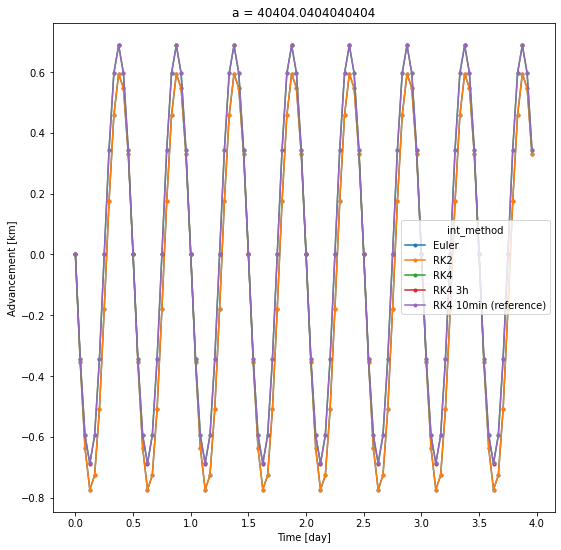

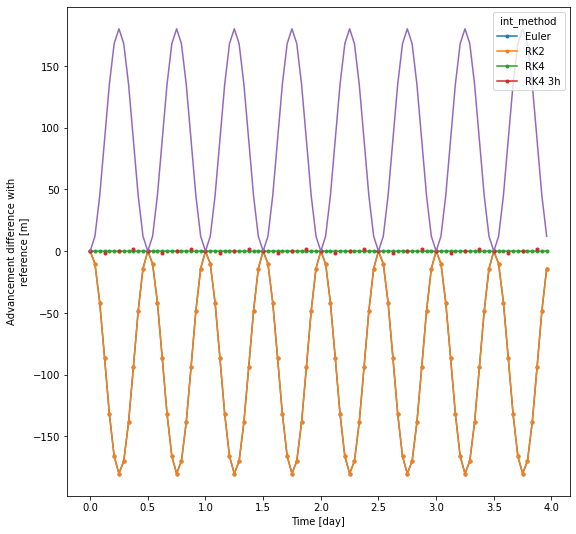

In [3]:
x=sti.SetUp(advected=0, k=0, um=0)# um=1, uw=0.5, advected=0)
comp=sti.Temp_Int_Comp(x, advected=0, k=0, um=0)#, um=1, uw=0.5, advected=0) #CAUTION: add parameters if parameters add in SetUp x different than default
comp.print_diff_adv()
t=x.out_ds.otime
err=x['uw']*sti.h2s/2/2*(1-xr.ufuncs.cos(x['w']*t))
err.attrs={'units':'m', "long_name":"Advancement difference with reference"}
err.plot(x='otime_day')




On both graph, Euler and RK2 are confused.
On the last print, for $phi=0$, we should have a positive error according to the error formula (curve added in purple): we have the opposite of what the formula wants...  
However,last graph is coherent with the first one as an negative error indeed corresponds to an euler advancement inferior to the reference advancement (since $\alpha=adv_{euler}-adv_{reference})$. -->enigma
But otherwise amplitude and periodicty correspond. 

## Error formula check
In case k=0 and unadvected (same case), computed the analytical solution for advancement and the euler solution

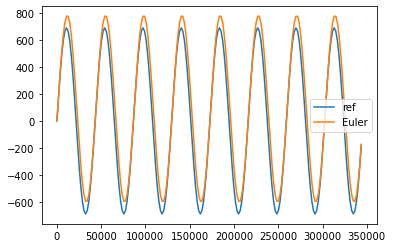

In [13]:
phi=0
uw=0.1
t_step=sti.h2s/2
t=np.arange(0,4*sti.d2s,t_step)

adv_ana=uw/sti.w2*(np.sin(sti.w2*t + phi)-np.sin(phi))#analytic solution
adv_euler=np.zeros_like(t)#euler solution:
s=0
for i in range(0,len(t)):
    adv_euler[i]=s
    s+=uw*t_step*np.cos(sti.w2*t[i]+phi)

plt.plot(t,adv_ana, label="ref")
plt.plot(t, adv_euler, label='Euler')
plt.legend()



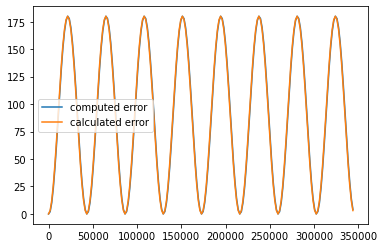

In [14]:
plt.plot(t,adv_euler-adv_ana,label='computed error')
error=uw*t_step/2*(np.cos(phi)-np.cos(sti.w2*t+phi))#error formula
plt.plot(t,error, label='calculated error')
plt.legend()

## Piste:
En sotant la somme du premier terme dans la boucle pour le calcul de l'incertitude d'euler, on retrouve le même type de graphes opposés

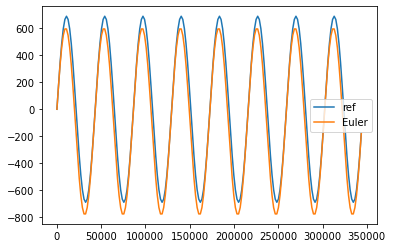

In [17]:
phi=0
uw=0.1
t_step=sti.h2s/2
t=np.arange(0,4*sti.d2s,t_step)

adv_ana=uw/sti.w2*(np.sin(sti.w2*t + phi)-np.sin(phi))#analytic solution
adv_euler=np.zeros_like(t)#euler solution
s=0
for i in range(1,len(t)):##Décalage
    s+=uw*t_step*np.cos(sti.w2*t[i]+phi)
    adv_euler[i]=s
    
#CORRECTION
#adv_euler+=uw*t_step*np.cos(sti.w2*t[0]+phi)
#adv_euler=np.delete(np.concatenate(([0],adv_euler)),-1)

plt.plot(t,adv_ana, label="ref")
plt.plot(t, adv_euler, label='Euler')
plt.legend()

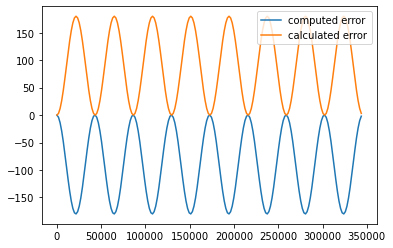

In [18]:
plt.plot(t,adv_euler-adv_ana,label='computed error')
error=uw*t_step/2*(np.cos(phi)-np.cos(sti.w2*t+phi))#error formula
plt.plot(t,error, label='calculated error')
plt.legend()

L'erreur retournée par le programme est en fait l'erreur de la formule à laquelle on a retiré le premier avancement d'euler et impliqué un décalage de temps -> regarder de plus près les calculs des positions 

### Test with `k=k2` (i.e longueur d'onde de 100km) unadvected
We take back the normal case with `k=k2` to see if the precedent error formula is still relevent.
The first serie of plot represents the advancement and the difference of this advancement with the reference advancement for each method.
The second represents the advancement average on particules, thus on initial phase and the absolute difference of advancement also average on particules.

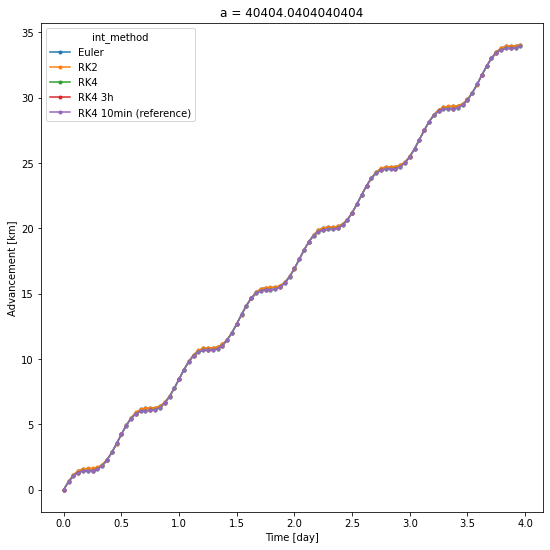

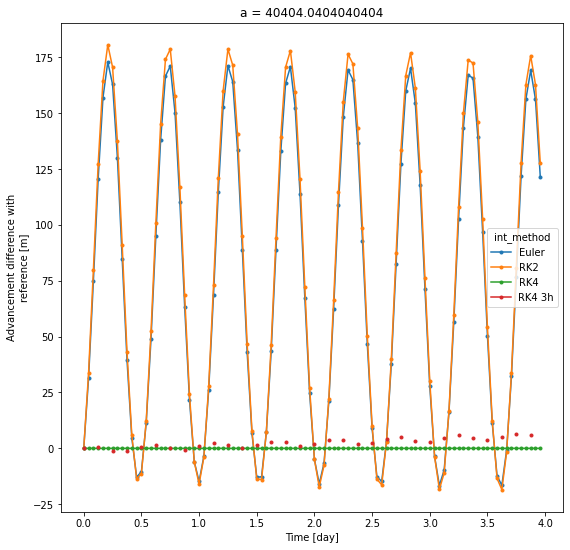

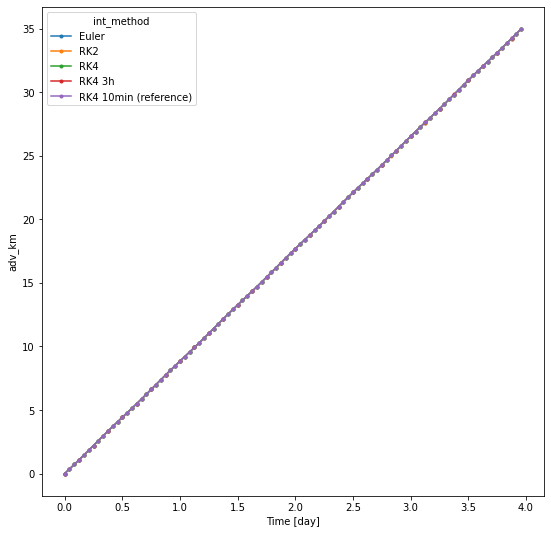

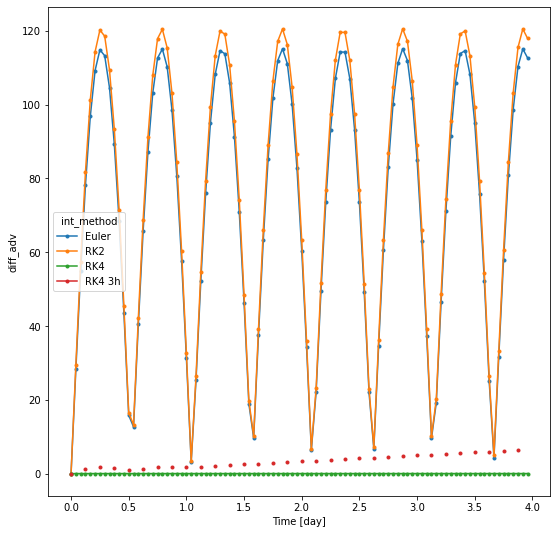

In [22]:
y=sti.SetUp(advected=0)# um=1, uw=0.5, advected=0)
compy=sti.Temp_Int_Comp(y,advected=0)#, um=1, uw=0.5, advected=0) #CAUTION: add parameters if parameters add in SetUp x different than default
compy.print_diff_adv()
compy.print_diff_adv_mean()

The second print shows that `k=k2` does not impact the amplitude which is still around 90.Indeed, $k_2*35*km=2.2 << w_2*4 jours=50$.  
Difference with last section appear to correspond to a change of $\phi$ in error formula (average value = $cos(\phi)$ and oscillation shift).  

$90*cos(\phi_0) = 90*cos(k2*40404)=-74$  
The absolute value of this seems to correspond to the average error for euler. 
But according to the error formula, the average error should be negative ->same PROBLEM of opposite.  
Last print shows that the absolute value and the average on particules erase a part of the amplitude (not the accurate method to study error ? ).


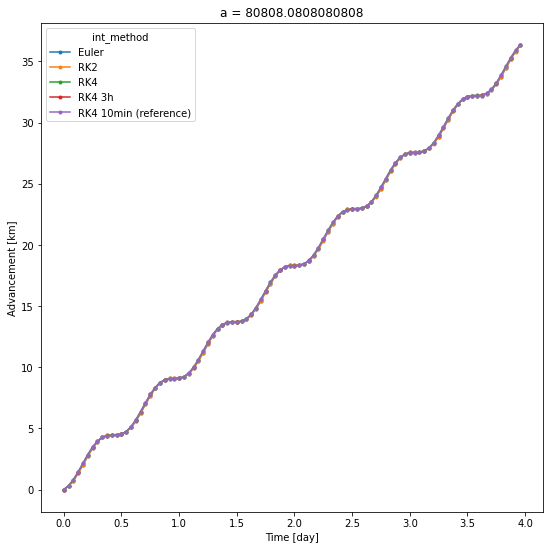

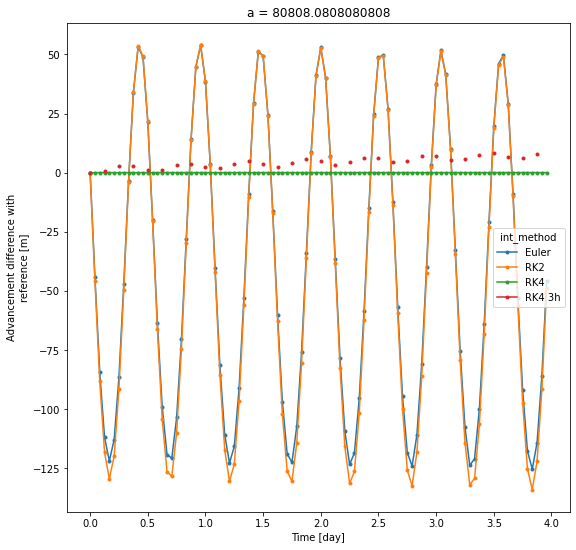

In [25]:
z=sti.SetUp(advected=0)
compz=sti.Temp_Int_Comp(z,advected=0)#CAUTION: add parameters if parameters add in SetUp x different than default
compz.print_diff_adv(traj=40)

$90*cos(\phi_0) = 90*cos(k2*40404)=32$ 
Absolute value is right, but opposite signe.

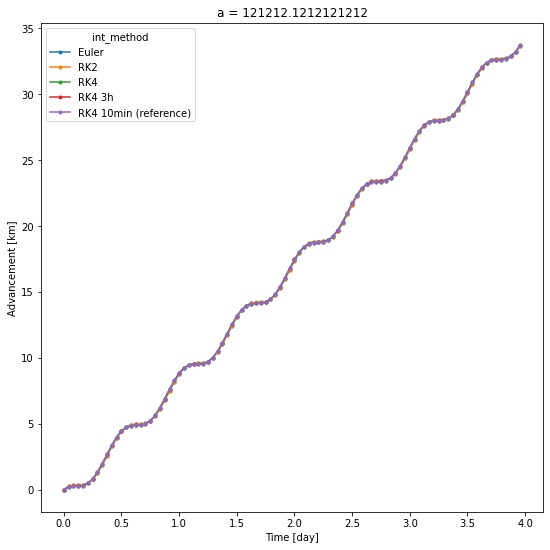

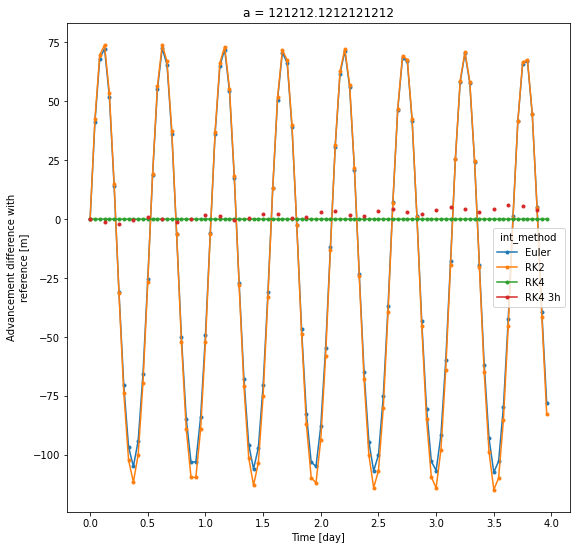

In [26]:
z=sti.SetUp(advected=0)
compz=sti.Temp_Int_Comp(z,advected=0) #CAUTION: add parameters if parameters add in SetUp x different than default
compz.print_diff_adv(traj=60)

$90*cos(\phi_0) = 90*cos(k2*40404)=21$ Idem

## Conclusion
**Problem of sign for all error, plots seems to fit the opposite error we have with the error formula...**

* le problème ne vient pas du plot de la différence de l'avancement, puisqu'on retrouve cette erreur de signe au niveau du plot de l'avancement, où l'on voit 

## Error dependency on parameters
I chose to work on the error amplitude which should be according to the error formula: $u_w*t_{step}$.
To select the error amplitude, I select max and min of the advancement difference with the reference (seems sufficiently regular for k around k2) for each parameters and for each method.

In [59]:
def dependency_comp_ds(list_Var, Dt, T, OT,
                        list_Var_Name=['velocity__um', 'velocity__uw','velocity__w', 'velocity__k'], 
                        dim_name=['um', 'uw','w','k'],
                        selected_time=list(np.arange(48,72,1))):#two periods
        
    x_ref=sti.SetUp(time= list(np.arange(0,sti.d2s*4, sti.h2s/6)))#10 min step 
    x_ref.update_model(intmethod=sti.Runge_Kutta4)

    def batch_time(x,ad_ref): 
        list_ad=[]    
        for j in range (len(Dt)):
            x.update_clock(time=T[j], otime=OT[j])
            ds_b=x.out_ds
            ad=((ds_b.advancement-ad_ref).max('otime')-(ds_b.advancement-ad_ref).min('otime')).mean('a')#-(ds_b.advancement-ad_ref).sel(otime=selected_time*sti.h2s).min('otime'))
            list_ad.append(ad)
        return xr.concat(list_ad, pd.Index((Dt), name="delta_t"))

    #Velocity Variables
    for i in range (len(list_Var)):
        ds_b=x_ref.batch_parameters(list_Var_Name[i], list_Var[i])
        dref=ds_b.advancement
     
        
        x=sti.SetUp()
        ds_b=x.batch_parameters(list_Var_Name[i], list_Var[i])
        de=((ds_b.advancement-dref).isel(otime=selected_time).max('otime')-(ds_b.advancement-dref).isel(otime=selected_time).min('otime')).mean('a')

    
        x.update_model(intmethod=sti.Runge_Kutta2)
        ds_b=x.batch_parameters(list_Var_Name[i], list_Var[i])
        drk2=((ds_b.advancement-dref).isel(otime=selected_time).max('otime')-(ds_b.advancement-dref).isel(otime=selected_time).min('otime')).mean('a')
    
        x.update_model(intmethod=sti.Runge_Kutta4)
        ds_b=x.batch_parameters(list_Var_Name[i], list_Var[i])
        drk4=((ds_b.advancement-dref).isel(otime=selected_time).max('otime')-(ds_b.advancement-dref).isel(otime=selected_time).min('otime')).mean('a')
    


    
        ds=xr.concat([de, drk2, drk4], pd.Index(["Euler", "RK2", "RK4"], name="int_method"))
        ds=ds.assign_coords({dim_name[i]:("batch", list_Var[i])})
        #ds=ds.reset_coords(['otime', 'otime_day'], drop=True)
        ds=ds.assign_attrs(units='m')
        ds=ds.rename({'batch':dim_name[i]})
        if i==0:
            DS=ds.to_dataset(name='error_adv_'+dim_name[0], promote_attrs=True)
        else:
            DS=DS.assign({'error_adv_'+ dim_name[i]: ds})
    
    #Delta Time  
    x=sti.SetUp()
    x_ref=sti.SetUp(time= list(np.arange(0,sti.d2s*4, sti.h2s/6)))#10 min step 
    x_ref.update_model(intmethod=sti.Runge_Kutta4)
    ad_ref=x_ref.out_ds.advancement
    list_dm=[batch_time(x,ad_ref)]
    x.update_model(intmethod=sti.Runge_Kutta2)
    list_dm.append(batch_time(x,ad_ref))
    x.update_model(intmethod=sti.Runge_Kutta4)
    list_dm.append(batch_time(x,ad_ref))
    ds=xr.concat(list_dm, pd.Index(["Euler", "RK2", "RK4"], name="int_method"))
    #ds=ds.reset_coords(['otime', 'otime_day'], drop=True)
    ds=ds.assign_attrs(units='m')
    DS=DS.assign({'error_adv_delta_time': ds})
    
    #ATTRS
    DS.um.attrs={'units':'m/s', "long_name":"mean flux velocity"}
    DS.uw.attrs={'units':'m/s', "long_name":"wave velocity"}
    DS.w.attrs={'units':'s⁻¹', "long_name":"wave pulsation"}
    DS.k.attrs={'units':'m⁻¹', "long_name":"wave vector"}
    DS.delta_t.attrs={'units':'min',"long_name":"simulation time step"}
    
    DS.coords['delta_t_min']=DS.delta_t/60
    DS.delta_t_min.attrs={"units":"min", "long_name":"simulation time step"}
    return DS
    

In [55]:
Um=[0, 0.1, 0.4,0.7,0.85,1]
Uw=[0, 0.1, 0.4,0.7,0.85,1]
W=[1/2*sti.w2,6/10*sti.w2,7/10*sti.w2,8/10*sti.w2,9/10*sti.w2,1*sti.w2]
K=list(np.linspace(0,0.001,10))
Var=[Um, Uw,W, K]

Dt=[sti.h2s/6,sti.h2s/2,sti.h2s,sti.h2s*3/2, sti.h2s*2,sti.h2s*5/2, sti.h2s*3]
T=[list(np.arange(0,sti.d2s*4, Dt[0])),
   list(np.arange(0,sti.d2s*4, Dt[1])),
   list(np.arange(0,sti.d2s*4, Dt[2])),
   list(np.arange(0,sti.d2s*4, Dt[3])),
   list(np.arange(0,sti.d2s*4, Dt[4])),
   list(np.arange(0,sti.d2s*4, Dt[5])),
   list(np.arange(0,sti.d2s*4,Dt[6]))]
OT=[list(np.arange(0,sti.d2s*4, sti.h2s)),
    list(np.arange(0,sti.d2s*4, sti.h2s)),
    list(np.arange(0,sti.d2s*4-sti.h2s, sti.h2s)),
    list(np.arange(0,sti.d2s*4-sti.h2s, sti.h2s*3/2)),
    list(np.arange(0,sti.d2s*4-sti.h2s, sti.h2s*2)),
    list(np.arange(0,sti.d2s*4-sti.h2s, sti.h2s*5/2)),
    list(np.arange(0,sti.d2s*4-sti.h2s, sti.h2s*3))]

#Var_Name=['velocity__um', 'velocity__uw','velocity__w']
#dim_name=['um', 'uw','w']
#units_name=['m/s','m/s','s⁻¹']
#Dt=[sti.h2s/6,sti.h2s/2,sti.h2s*3]
#T=[list(np.arange(0,sti.d2s*4, Dt[0])),list(np.arange(0,sti.d2s*4, Dt[1])),list(np.arange(0,sti.d2s*4,Dt[2]))]
#OT=[list(np.arange(0,sti.d2s*4, sti.h2s)),list(np.arange(0,sti.d2s*4, sti.h2s)),list(np.arange(0,sti.d2s*4-sti.h2s, sti.h2s*3))]

ds=dependency_comp_ds(list_Var=Var, OT=OT, T=T, Dt=Dt)
ds

<xarray.Dataset>
Dimensions:               (delta_t: 7, int_method: 3, k: 10, um: 6, uw: 6, w: 6)
Coordinates:
  * int_method            (int_method) object 'Euler' 'RK2' 'RK4'
  * um                    (um) float64 0.0 0.1 0.4 0.7 0.85 1.0
  * uw                    (uw) float64 0.0 0.1 0.4 0.7 0.85 1.0
  * w                     (w) float64 7.272e-05 8.727e-05 ... 0.0001454
  * k                     (k) float64 0.0 0.0001111 ... 0.0008889 0.001
  * delta_t               (delta_t) float64 600.0 1.8e+03 ... 9e+03 1.08e+04
    delta_t_min           (delta_t) float64 10.0 30.0 60.0 ... 120.0 150.0 180.0
Data variables:
    error_adv_um          (int_method, um) float64 178.5 178.5 ... 0.003234
    error_adv_uw          (int_method, uw) float64 6.548e-13 178.5 ... 0.6784
    error_adv_w           (int_method, w) float64 179.6 179.4 ... 0.003234
    error_adv_k           (int_method, k) float64 180.0 178.2 ... 0.1445 0.1998
    error_adv_delta_time  (int_method, delta_t) float64 59.76 181.8 ... 9.203
Attributes:
    units:    m

This figure highlights that RK4 error is smaller:

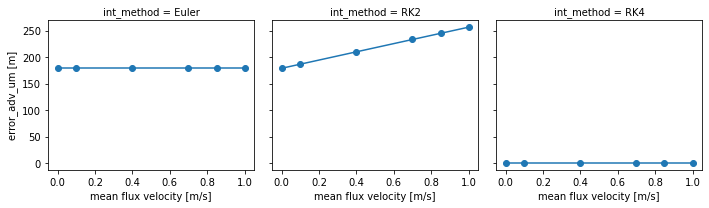

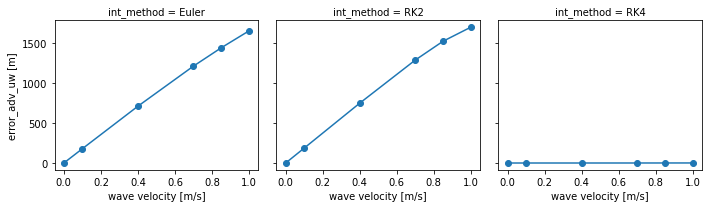

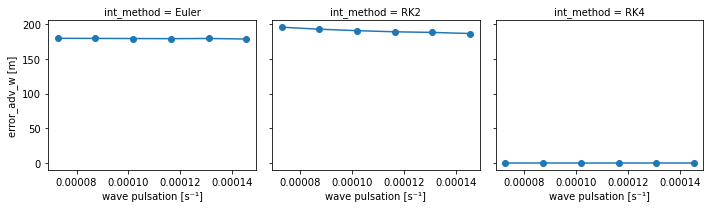

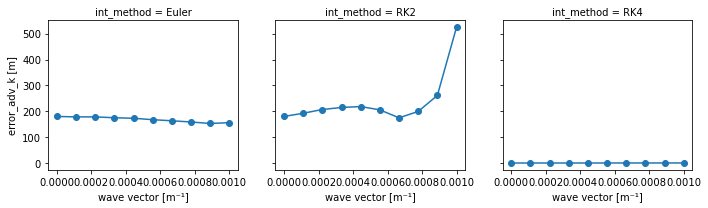

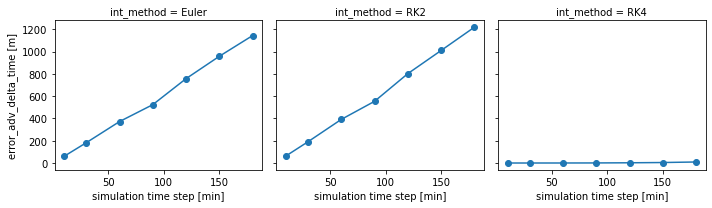

In [56]:
ds.error_adv_um.plot(col='int_method',marker='o')
ds.error_adv_uw.plot(col='int_method',marker='o')
ds.error_adv_w.plot(col='int_method',marker='o')
ds.error_adv_k.plot(col='int_method',marker='o')
ds.error_adv_delta_time.plot( x='delta_t_min',col='int_method',marker='o')

This one shows type of dependency for all:

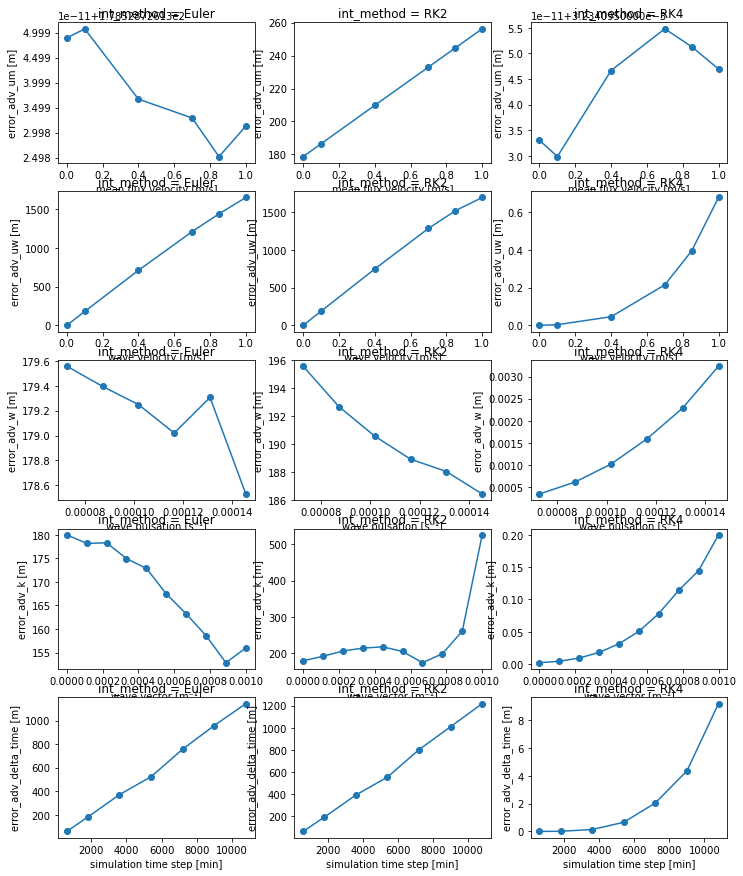

In [57]:
fig, axes = plt.subplots(ncols=3,nrows=5,figsize=(12,15))
method=['Euler','RK2', 'RK4']
for i in range(3):
    ds.error_adv_um.sel(int_method=method[i]).plot(ax=axes[0][i], marker='o')
    ds.error_adv_uw.sel(int_method=method[i]).plot(ax=axes[1][i], marker='o')
    ds.error_adv_w.sel(int_method=method[i]).plot(ax=axes[2][i], marker='o')
    ds.error_adv_k.sel(int_method=method[i]).plot(ax=axes[3][i], marker='o')
    ds.error_adv_delta_time.sel(int_method=method[i]).plot(ax=axes[4][i], marker='o')

And this figure only dependency for RK4 (complemenary to the first one)

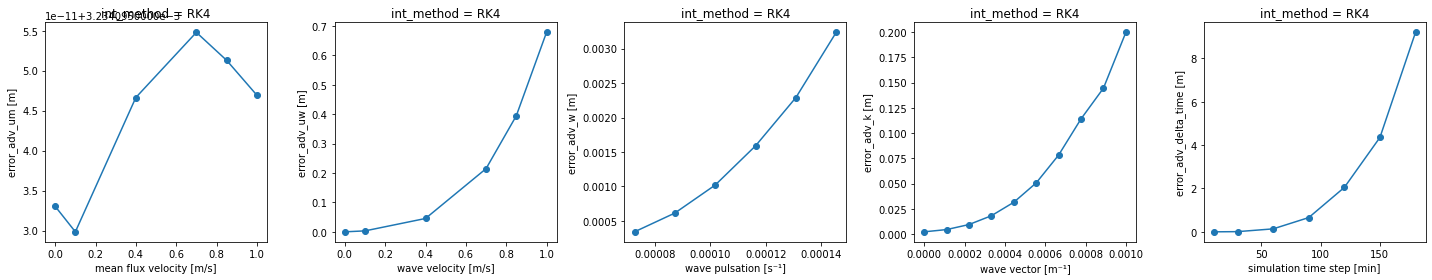

In [58]:
fig, axes = plt.subplots(ncols=5, figsize=(20,4))
ds.error_adv_um.sel(int_method='RK4').plot(marker='o',ax=axes[0])
ds.error_adv_uw.sel(int_method='RK4').plot(marker='o',ax=axes[1])
ds.error_adv_w.sel(int_method='RK4').plot(marker='o',ax=axes[2])
ds.error_adv_k.sel(int_method='RK4').plot(marker='o',ax=axes[3])
ds.error_adv_delta_time.sel(int_method='RK4').plot( x='delta_t_min', marker='o',ax=axes[4])
plt.tight_layout()

plt.draw()

## Observations
* The uw and t_step dependence for Euler method seems linear, as expected
* Error amplitude of RK2 method seems to be more sensitive to mean flux velocity um and wave vector k2, but appears to also have a linear dependance on wave velocity $u_w$ and simulation time step $t_{step}$
* RK4 error amplitude is far smaller than others, and seems to have polynomial or exponential dependency on $u_w, w, k, t_{step}$
* Dependency on $u_m$ for Euler and RK4 can be neglected (10e-11 m )
* Notice that for k=0, the amplitude is around 180 m,the expected value

### Linear regression on advancement ???

In [14]:
comp.reglin_mean_adv()

<xarray.Dataset>
Dimensions:               (degree: 2, int_method: 5)
Coordinates:
  * degree                (degree) int64 1 0
  * int_method            (int_method) object 'Euler' ... 'RK4 10min (referen...
Data variables:
    polyfit_coefficients  (degree, int_method) float64 0.1022 0.1022 ... -0.9063